In [2]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 9.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.4/922.4 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 13.0 MB/s eta 0:0

In [8]:
import subprocess
import sys

subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 945.4 kB/s eta 0:00:00m eta 0:00:0136m0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


0

In [9]:
# Import the spaCy library
import spacy

# Load the small English language model
nlp = spacy.load("en_core_web_sm")

# Process a sample sentence with the loaded language model
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Loop through each word (token) in the processed sentence
for token in doc:
    # Print the word, its part-of-speech tag, and its syntactic dependency
    print(token.text, token.pos_, token.dep_)

# Explanation of the printed information:
# Text: The original word in the sentence.
# POS: The part-of-speech tag (e.g., noun, verb, adjective).
# Dep: The syntactic dependency, which shows the relationship between words in the sentence.


Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dep
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


Even though a Doc is processed, e.g. split into individual words and annotated - it still holds all information of the original text, like whitespace characters. You can always get the offset of a token into the original string, or reconstruct the original by joining the tokens and their trailing whitespace. This way, you’ll never lose any information when processing text with spaCy.

# Tokenization 
During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off - whereas ‘U.K.’ should remain one token. Each Doc consists of individual tokens, and we can iterate over them:

In [10]:
import spacy  # Import the spaCy library

# Load the small English language model
nlp = spacy.load("en_core_web_sm")

# Process the text to create a Doc object
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over each token in the Doc and print the token's text
for token in doc:
    print(token.text)


Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


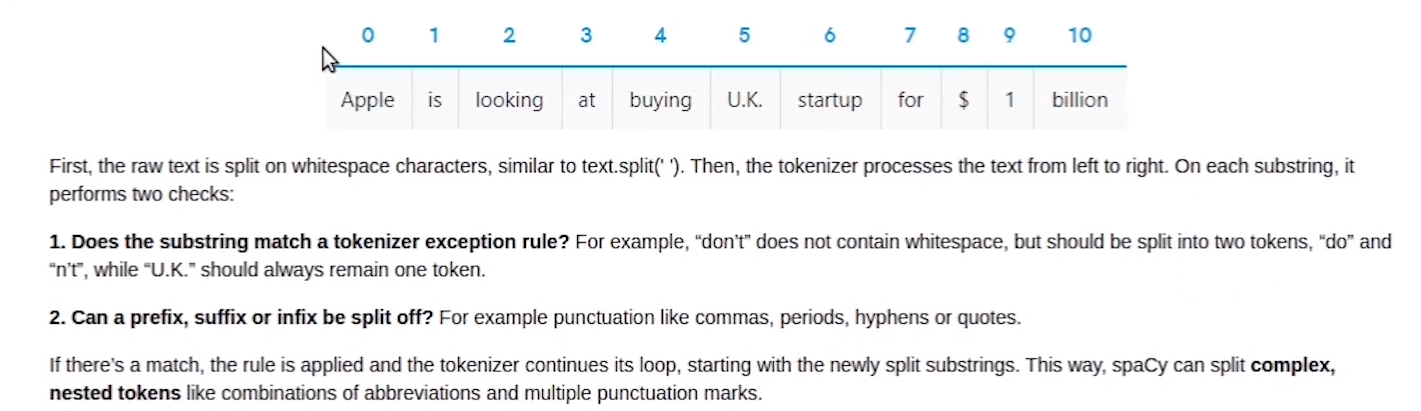

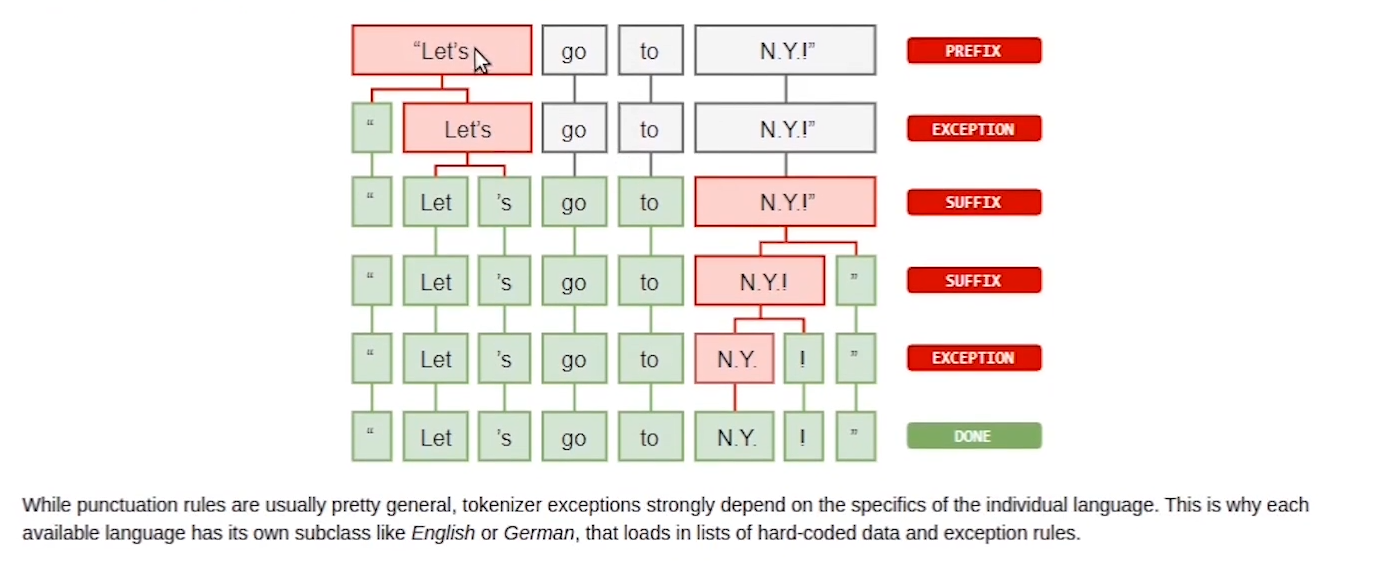

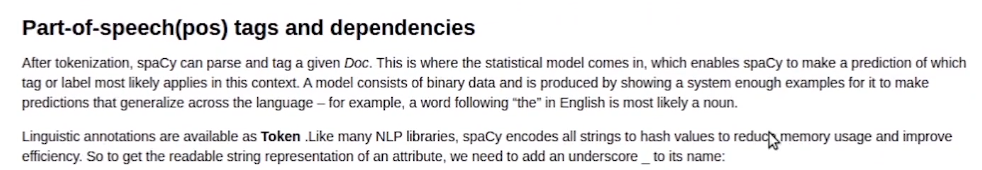

In [11]:
import spacy  # Import the spaCy library

# Load the small English language model
nlp = spacy.load("en_core_web_sm")

# Process the text to create a Doc object
doc = nlp("Coronavirus: Delhi resident tests positive for coronavirus, total 31 people infected in India")

# Iterate over each token in the Doc and print various attributes
for token in doc:
    print(
        token.text,        # The original text of the token
        token.lemma_,      # The base form of the token
        token.pos_,        # The part of speech tag
        token.tag_,        # The detailed part of speech tag
        token.dep_,        # The syntactic dependency
        token.shape_,      # The shape of the token (e.g., "Xxxx" for "Apple")
        token.is_alpha,    # Is the token an alphabetic word?
        token.is_stop      # Is the token a stop word?
    )


Coronavirus coronavirus NOUN NN nsubj Xxxxx True False
: : PUNCT : punct : False False
Delhi Delhi PROPN NNP advmod Xxxxx True False
resident resident NOUN NN compound xxxx True False
tests test NOUN NNS nsubj xxxx True False
positive positive ADJ JJ amod xxxx True False
for for ADP IN prep xxx True True
coronavirus coronavirus NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
total total ADJ JJ ROOT xxxx True False
31 31 NUM CD nummod dd False False
people people NOUN NNS dobj xxxx True False
infected infect VERB VBN acl xxxx True False
in in ADP IN prep xx True True
India India PROPN NNP pobj Xxxxx True False


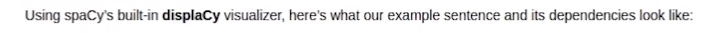

In [12]:
import spacy
from spacy import displacy

# Load the spaCy model (en_core_web_sm)
nlp = spacy.load("en_core_web_sm")

# Create a Doc object containing the sentence to be parsed
doc = nlp("Google, Apple crack down on fake coronavirus apps")

# Display the parsed sentence using displacy.serve()
displacy.serve(doc, style="dep")


/home/tar-tt060-saurav/.local/lib/python3.10/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



127.0.0.1 - - [24/Jul/2024 16:34:18] "GET / HTTP/1.1" 200 6739
127.0.0.1 - - [24/Jul/2024 16:34:18] "GET /favicon.ico HTTP/1.1" 200 6739


Shutting down server on port 5000.


# Named Entities

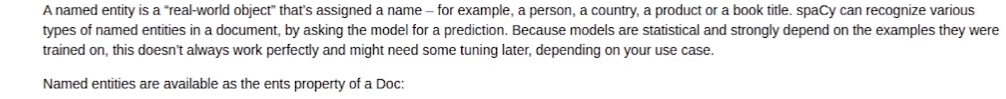

In [13]:
import spacy  # Import the spaCy library

nlp = spacy.load("en_core_web_sm")  # Load the small English language model

# Create a sentence to process
doc = nlp("Coronavirus: Delhi resident tests positive for coronavirus, total 31 people infected in India")

# Identify named entities in the sentence
for ent in doc.ents:
    # Print the text of the entity, its starting and ending character position, and its label
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


Delhi 13 18 GPE
31 66 68 CARDINAL
India 88 93 GPE


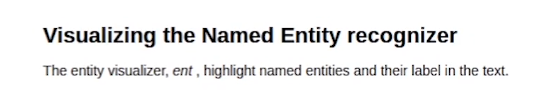

In [15]:
import spacy
from spacy import displacy

# This line imports the spaCy library, which is a free open-source library for natural language processing (NLP)

text = "Coronavirus: Delhi resident tests positive for coronavirus, total 31 people infected in India"

# This line assigns a string to a variable named text. The string contains a sentence about a coronavirus case in India.

nlp = spacy.load("en_core_web_sm")

# This line loads a pre-trained spaCy model for English named entity recognition (NER). The "en_core_web_sm" model is a small model that is efficient to use for basic tasks.

doc = nlp(text)

# This line applies the loaded model to the text variable and stores the results in a variable named doc. The doc variable now contains a spaCy Doc object, which holds the linguistic analysis of the text.

displacy.serve(doc, style="ent")

# This line displays the named entities found in the text using displacy. The "ent" style argument specifies that we want to see the named entity tags.

# https://spacy.io/api/annotation#named-entities



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


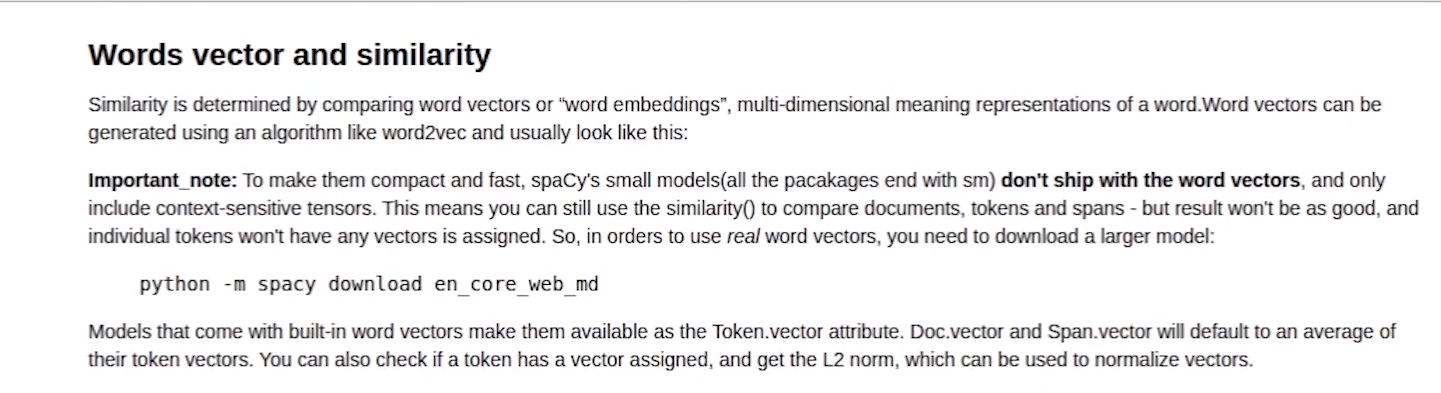

In [16]:
#!python -m spacy download en_core_web_md
import spacy.cli
spacy.cli.download("en_core_web_md")

import en_core_web_md
nlp = en_core_web_md.load()


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 744.6 kB/s eta 0:00:00m eta 0:00:010:00:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
import spacy

nlp = spacy.load("en_core_web_md")  # Load the English language model
tokens = nlp("lion bear apple banana fadsfdshds")  # Create a Doc object from the text

for token in tokens:             
  print(token.text, token.has_vector, token.vector_norm, token.is_oov)

# Vector norm: The L2 norm of the token's vector (the square root of the sum of the values squared)
# has vector: Does the token have a vector representation?
# OOV: Out-of-vocabulary


lion True 55.145737 False
bear True 52.114674 False
apple True 43.366478 False
banana True 31.620354 False
fadsfdshds False 0.0 True



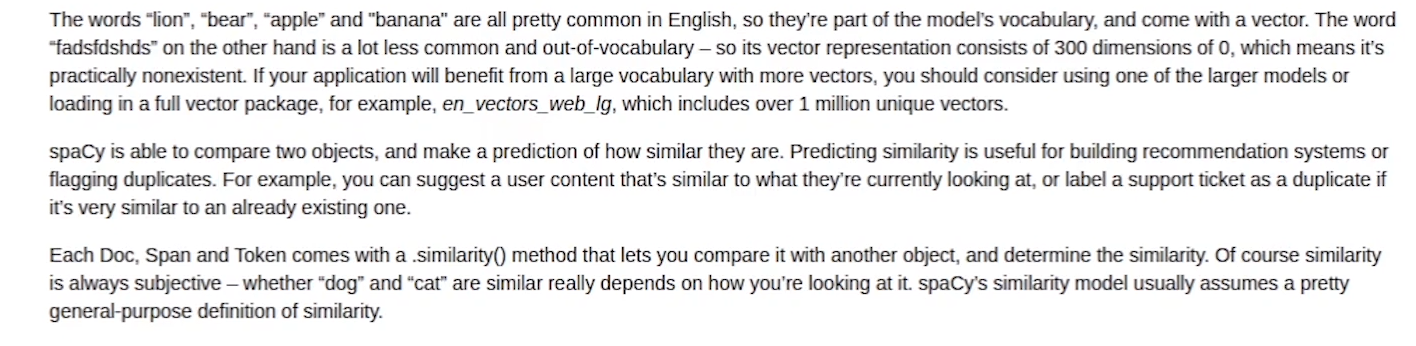

In [18]:
import spacy  # Import the spaCy library

# Load a larger English language model - "en_core_web_md" is used in the example
# Make sure to download this model before running the code: python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")

# Create a sentence to process
sentence = "lion bear cow apple mango spinach"

# Tokenize the sentence - break it down into individual words
tokens = nlp(sentence)

# Iterate over each token and compare it to other tokens in the sentence
# Print the text of the token, another token for comparison, and their similarity score
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))


lion lion 1.0
lion bear 0.40031397342681885
lion cow 0.4524093568325043
lion apple 0.06742796301841736
lion mango 0.18510109186172485
lion spinach 0.06951921433210373
bear lion 0.40031397342681885
bear bear 1.0
bear cow 0.2781473994255066
bear apple 0.18584339320659637
bear mango 0.14443379640579224
bear spinach 0.0758492723107338
cow lion 0.4524093568325043
cow bear 0.2781473994255066
cow cow 1.0
cow apple 0.25756582617759705
cow mango 0.26287969946861267
cow spinach 0.261837899684906
apple lion 0.06742796301841736
apple bear 0.18584339320659637
apple cow 0.25756582617759705
apple apple 1.0
apple mango 0.6305076479911804
apple spinach 0.5129707455635071
mango lion 0.18510109186172485
mango bear 0.14443379640579224
mango cow 0.26287969946861267
mango apple 0.6305076479911804
mango mango 1.0
mango spinach 0.5483009219169617
spinach lion 0.06951921433210373
spinach bear 0.0758492723107338
spinach cow 0.261837899684906
spinach apple 0.5129707455635071
spinach mango 0.5483009219169617
spin

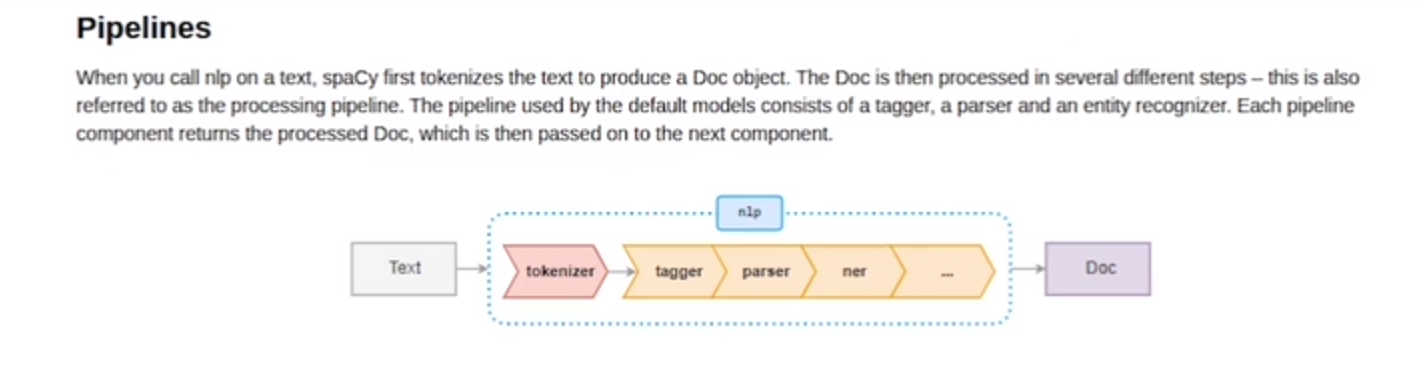

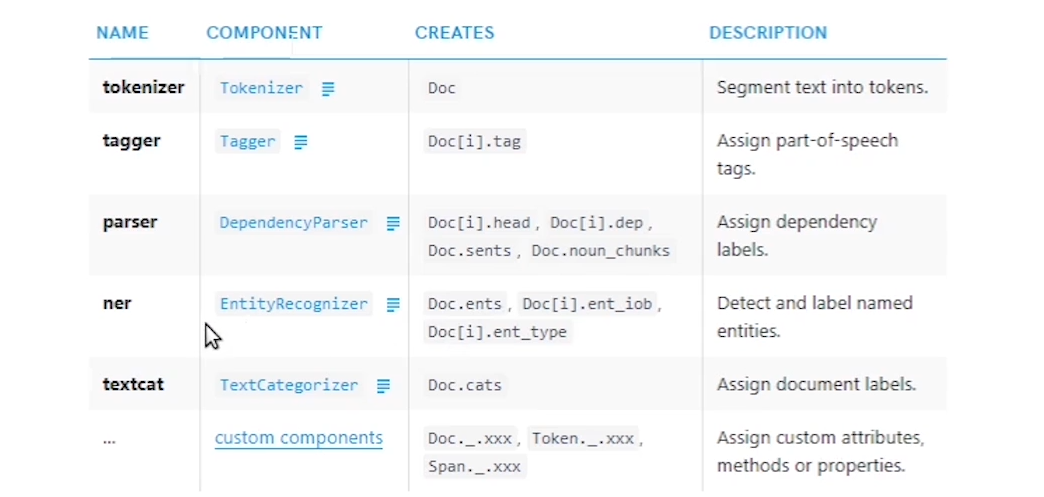


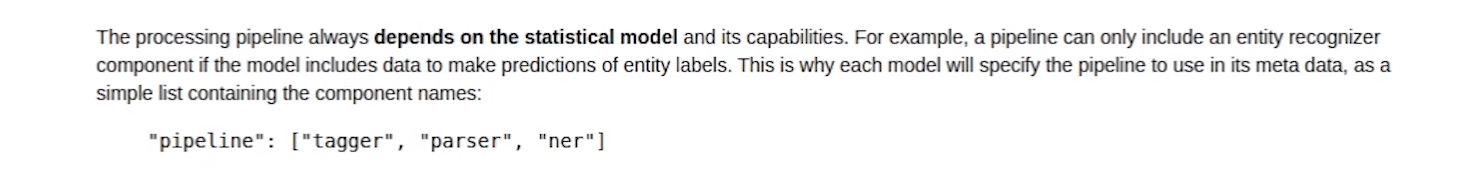